<a href="https://colab.research.google.com/github/havanluan/CS114.K21/blob/master/Giuaki_Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

***Lấy data từ link bằng thư viện pandas***

Dùng method read_csv của pandas để đọc file txt từ link đưa vào.

Method này sẽ đọc link và tạo ra một DataFrame với các cột lần lượt là size và time tương ứng. 

Ta cần rename lại các cột

In [0]:
import pandas as pd

In [0]:
url = "http://cs.uit.edu.vn/data3.txt"

In [0]:
data = pd.read_csv(url, header = None)


In [0]:
data.columns = ['Size','Time']

In [226]:
data

,Size,Time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831
...,...,...
10585,26872494,2.35117
10586,20753811,1.79155
10587,33520323,2.90918
10588,21243264,1.80292


## Visualize Data

// Biểu diễn dữ liệu thể hiện sự biến thiên của Time phụ thuộc vào Size

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
X = data.values[:,0].copy()
y = data.values[:,1].copy()

In [0]:
X = np.array(X)
y = np.array(y)

[Text(0.5, 1.0, 'SIZE AND TIME'), Text(0.5, 0, 'Size'), Text(0, 0.5, 'Time')]

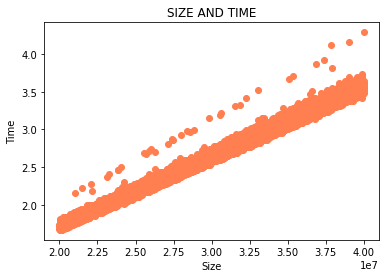

In [230]:
plt.scatter(X, y, c='coral')
plt.gca().update(dict(title='SIZE AND TIME', xlabel='Size', ylabel='Time'))

## Split Data

***Phân chia dữ liệu thành hai tập train và test, trong đó tập test chiếm 20%***

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Predict Test Set

***Dùng model đã train ở trên, dự đoán trên tập test***

Màu cam được biểu diễn là các điểm dữ liệu, màu xanh là đường thẳng theo hàm hypothesis có được sau khi train model

In [0]:
a = 8.456874995382559e-08
b = -0.01594357399445545

In [0]:
y_pre = X_test*a + b

In [235]:
y_pre

array([2.09257253, 2.18115255, 2.62016568, ..., 2.16621466, 1.69205883,
       2.16766747])

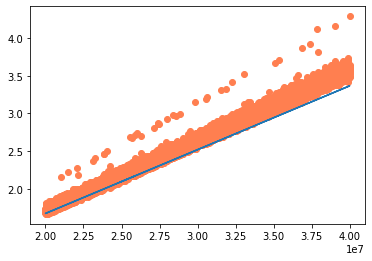

In [236]:
plt.scatter(X, y, c='coral')
plt.plot(X_test,y_pre)

## Evaluate the model

***Gía trị sai số trung bình***

So với tập dữ liệu ở round 2, trung bình phần trăm sai số trên giá trị thực của tập dữ liệu ở round 3 thấp hơn (4.35% so với 27.62%). Vì dữ liệu của round 2 có nhiều giá trị nhiễu.

In [0]:
evl = abs(y_pre - y_test)

In [238]:
test_err_tb = evl.mean()
print('Sai số trung bình:', test_err_tb)

Sai số trung bình: 0.12070302340003153


In [0]:
err_tb = evl/y_test
err_tb = err_tb.mean()

In [240]:
print('Trung binh phan tram sai so tren gia tri thuc:', err_tb*100,'%')

Trung binh phan tram sai so tren gia tri thuc: 4.357525788745079 %


## Tạo model mới

***Thêm thuộc tính với giá trị bằng 1 cho tất cả các instance***

In [0]:
X = np.array([X])

In [0]:
X = X.T

In [0]:
one = np.ones((X.shape[0], 1))
X = np.concatenate((one, X), axis = 1)

In [244]:
X

array([[1.0000000e+00, 3.7837612e+07],
       [1.0000000e+00, 3.7395246e+07],
       [1.0000000e+00, 3.6610827e+07],
       ...,
       [1.0000000e+00, 3.3520323e+07],
       [1.0000000e+00, 2.1243264e+07],
       [1.0000000e+00, 2.1380484e+07]])

***Phân chia dữ liệu thành hai tập train và test, trong đó tập test chiếm 20%***

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

***Train model***

In [0]:
model = LinearRegression(fit_intercept=True)

In [247]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pre = model.predict(X_test)

***Evaluate***

In [0]:
evl = abs(y_pre - y_test)

In [250]:
test_err_tb = evl.mean()
print('Sai số trung bình:', test_err_tb)

Sai số trung bình: 0.042837602778305735


In [0]:
err_tb = evl/y_test
err_tb = err_tb.mean()

In [253]:
print('Trung binh phan tram sai so tren gia tri thuc:', err_tb*100,'%')

Trung binh phan tram sai so tren gia tri thuc: 1.623273972192402 %


***Rút ra đánh giá***

Gía trị trung bình phần trăm sai số trên giá trị thực của model này thấp hơn ( 1.62% so với 4.35%. Cho thấy model này dự đoán chính xác hơn